# HSE 2023: Введение в машинное обучение БИ 22/23

## ДЗ 1

### Внимание!
* Если в задании просят объяснить что-либо, то это значит, что требуется **письменный ответ**, который **является** частью задания и оценивается
* **Не** загружайте датасет (titanic.csv) в тестирующую систему (он у нас и так есть)
* Мы **только** принимаем **ipynb** ноутбуки. Если вы используете Google Colab, то вам необходимо скачать ноутбук перед сдачей ДЗ
* **Не** используйте циклы python вместо векторных операций NumPy над векторами NumPy - это сильно влияет на производительность (можете почитать почему https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), наказывается -0.25 за **каждое** задание. Циклы разрешены только в части 1 (Задания 1 - 4). 
* Некоторые задания содержат тесты. Они тестируют ваше решение только для простых случаев. Таким образом, прохождение теста, **не** гарантирует полной оценки за задание. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 балла) 

**Задание 1** (0.5 балла)<br/> 
Даны ненулевые числа `a`,  `r` и `N`. Найдите произведение первых `N` членов геометрической прогрессии с первым членом `a` и множителем `r` без использования формулы для произведения первых `N` членов

In [4]:
def find_product(a,r,N):
    arr_product = 1
    for i in range(N):
        arr_product *= a
        a *= r
    return arr_product

a = 2
r = 3
N = 5
print(find_product(a,r,N))

1889568


**Задание 2** (0.5 балла) <br/> 
Дано целое число `N`. Проверьте является ли оно палиндромом. Это значит, что число читается одинаково слева направо и справа налево. 

In [5]:
def check_palindrome(N):
    if str(N)==str(N)[::-1]:
        check_palindrome = True
    else:
        check_palindrome = False
    return check_palindrome

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Задание 3** (0.5 балла) <br/> 
Найдите первые `N` палиндромов для чисел, начинающихся от 1000 (вы можете использовать функцию из предыдущего задания).

In [9]:
def find_palindromes(N):
    palindromes = []
    num = 1000
    while len(palindromes) < N:
        if check_palindrome(num):
            palindromes.append(num)
        num +=1
    return palindromes

print(find_palindromes(5))
print(find_palindromes(10))
#print(find_palindromes(1000))

[1001, 1111, 1221, 1331, 1441]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991]


**Задание 4** (0.5 балла) <br/> 
Даны числа: `a`, `b`, `c`. Без использования функций `min`, `max` и других, найдите минимальное.

In [10]:
from random import randint

def find_min(*args):
    min_ = args[0]
    for i in range(1, len(args)):
        if args[i] < min_:
            min_ = args[i]
    return min_

for i in range(10):
    
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    
    print(a, b, c, '\tMinimum:', find_min(a, b, c))

-6 -41 17 	Minimum: -41
91 -90 -54 	Minimum: -90
-98 59 -93 	Minimum: -98
12 32 79 	Minimum: 12
-6 -54 -97 	Minimum: -97
-64 -79 -66 	Minimum: -79
64 95 85 	Minimum: 64
4 11 72 	Minimum: 4
-50 -25 -67 	Minimum: -67
67 56 48 	Minimum: 48


# 2. Numpy (4 балла)

**Задание 1** (0.5 балла) <br/>
Создайте случайный numpy вектор (`np.random.rand()`) длины 17 и с суммой элементов равной 6.

In [11]:
my_array = np.random.rand(17)
my_array = my_array / my_array.sum() * 6
print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 17
Sum of elements: 6.0


**Задание 2** (0.5 балла) <br/>
Создайте два случайных вектора $a$ и $b$ одинаковой длины. 

Расчитайте следующие расстояния между векторами **без использования специальных функций. Вы можете использовать только базовые операции numpy  (`np.linalg.*` и другие высокоуровневые методы и пакеты запрещены).**:

* Manhattan
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [12]:
def calculate_manhattan(a, b):    
    distance = np.abs(a - b).sum()
    return distance

def calculate_euclidean(a, b):    
    distance = np.sqrt(((a - b) ** 2).sum())
    return distance

def calculate_chebyshev(a, b):    
    distance = np.abs(a - b).max()
    return distance

def calculate_cosine(a, b):    
    cosine_similarity = 1 - np.dot(a, b) / (np.sqrt(np.dot(a, a)) * np.sqrt(np.dot(b, b)))
    distance = 1 - cosine_similarity
    return distance

In [13]:
a = np.random.rand(10)
b = np.random.rand(10)
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Manhattan distance: 2.5702260615862684
Euclidean distance: 0.9456404391451337
Chebyshev distance: 0.48215464364009974
Cosine distance: 0.822035818945446


**Задание 3** (0.5 балла) <br/>
Создайте случайный вектор (`np.random.randint()`) длины 76. Трансформируйте вектор так, чтобы после преобразования он имел следующие свойства 
* Максимальный элемент -1
* Минимальный элемент -4
* Оставшиеся значения в интервале (-4; -1) без изменения относительного порядка ([1, 2, 4] -> [0.1, 0.2, 0.4] - порядок сохранен)

In [14]:
def transform(array):
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    transformed_array = 3 * normalized_array - 4
    return transformed_array

In [15]:
my_array = x = np.random.randint(0, 11, 76)
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -4.0
Max: -1.0
Array:
[-3.4 -1.3 -2.2 -3.1 -3.7 -1.  -1.  -3.1 -3.7 -1.3 -2.5 -1.9 -2.8 -1.6
 -3.4 -3.7 -4.  -1.  -2.2 -3.1 -3.7 -3.4 -4.  -1.6 -4.  -1.6 -4.  -1.6
 -3.7 -3.1 -1.9 -4.  -1.6 -2.8 -2.2 -1.6 -2.5 -1.  -3.4 -4.  -4.  -1.9
 -3.7 -2.2 -3.7 -1.  -2.8 -1.3 -2.2 -1.6 -3.4 -2.5 -1.9 -2.8 -3.7 -1.9
 -2.5 -2.2 -1.3 -1.3 -3.7 -3.4 -1.6 -1.9 -1.  -2.2 -1.  -1.  -1.  -1.9
 -2.8 -3.1 -1.  -1.  -2.5 -3.1]


**Задание 4** (0.5 балла) <br/>
Создайте матрицу размерности $8 \times 5$ с целыми числами из промежутка [-7, 43]. Выведите колонку, которая содержит максимальный элемент матрицы.

In [16]:
my_array = np.random.randint(-7, 43, size=(8, 5))
selected_column = np.argmax(my_array) % 5
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

Shape:  (8, 5)
Array:
[[27 -3 27 22 22]
 [30 -6 39 25 -7]
 [ 2 31 -4 37 15]
 [ 7 16  3 -2 17]
 [30 37  0 24 -7]
 [ 5 -4 -4 -3 12]
 [36 35 22 -3 22]
 [ 6 32  4  4 28]]
Selected column: 2


**Задание 5** (0.5 балла) <br/>

Замените все пропущенные значения на медиану.

In [42]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[       nan 0.64166425        nan        nan 0.02138261 0.02934687
 0.69090395 0.76441511 0.76123019 0.09106305]


In [43]:
def replace_missing(arr):
    array_without_missing = arr.copy()
    mask = np.isnan(array_without_missing)
    median = np.median(array_without_missing[~mask])
    array_without_missing[mask] = median
    return array_without_missing

In [44]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.64166425 0.64166425 0.64166425 0.64166425 0.02138261 0.02934687
 0.69090395 0.76441511 0.76123019 0.09106305]


**Задание 6** (0.5 балла) <br/>
Создайте функцию, которая принимает на вход картинку ```X``` (3D вектор размерности (n, m, 3)) и возвращает среднее по всем 3 каналам (вектор размерности 3).

In [47]:
def mean_channel(X):
    mean1 = np.mean(X[:, :, 0])
    mean2 = np.mean(X[:, :, 1])
    mean3 = np.mean(X[:, :, 2])
    return np.array([mean1, mean2, mean3])

In [48]:
n = 19
m = 23
X =  np.random.randint(-11, 8, size=(n, m, 3))

print(f'Vector of means: {mean_channel(X)}')

Vector of means: [-1.9610984  -2.36155606 -2.11441648]


**Задание 7** (1 балл) <br/>
Создайте функцию, которая принимает 3D вектор ```X``` на вход и возвращает все уникальные слои по 1 оси.

Пример входных данных:

     ([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]
        [4, 5, 6]],

       [[7, 8, 9],
        [7, 8, 9]
        [7, 8, 9]]])
        
Пример выходных:

     ([[[1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]],

       [[7, 8, 9],
        [7, 8, 9]]])

In [49]:
def get_unique_columns(X):
    X_unique = np.unique(X, axis=1)
    return X_unique

def get_unique_columns(X):
    unique_cols = []
    for j in range(X.shape[1]):
        col = X[:, j, :]
        is_unique = True
        for unique_col in unique_cols:
            if np.array_equal(unique_col, col):
                is_unique = False
                break
        if is_unique:
            unique_cols.append(col)
        X_unique = np.stack(unique_cols, axis=1)
    return X_unique

In [59]:
X =  np.random.randint(4, 6, size=(4, 3, 3))
print('Matrix:')
print(X)
print('Unique rows:')
get_unique_columns(X)

Matrix:
[[[5 4 4]
  [4 5 4]
  [5 5 4]]

 [[5 5 4]
  [4 4 4]
  [5 4 4]]

 [[4 5 5]
  [5 5 5]
  [5 4 5]]

 [[4 4 4]
  [5 5 5]
  [4 5 5]]]
Unique rows:


array([[[5, 4, 4],
        [4, 5, 4],
        [5, 5, 4]],

       [[5, 5, 4],
        [4, 4, 4],
        [5, 4, 4]],

       [[4, 5, 5],
        [5, 5, 5],
        [5, 4, 5]],

       [[4, 4, 4],
        [5, 5, 5],
        [4, 5, 5]]])

# 3. Pandas & Visualization (4 балла)


Вам предстоит работа с датасетом *Titanic*, который содержит информацию о пассажирах Титаника:
- **Survived** - 1 - выжил, 0 - умер (0); **Целевая переменная**
- **pclass** - класс пассажира;
- **sex** - пол пассажира
- **Age** - возраст пассажира в годах
- **sibsp**    - есть ли на борту братья и сестры   
- **parch**    - есть ли на борту родители или дети
- **ticket** - номер билета    
- **fare** - цена билета    
- **cabin** - номер каюты
- **embarked** - порт посадки; C = Cherbourg, Q = Queenstown, S = Southampton

**Заметка** Для всех визуализаций используйте  matplotlib или seaborn, но НЕ plotly! Графики Plotly иногда исчезают после сохранения. В этом случае задание оценено не будет.

**Заметка** все ваши ответы должны быть поддержаны необходимым кодом, вычислениями, визуализацией и объяснениями. Ответы без кода и объяснений оцениваться не будут.

**Задание 0** (0 баллов) \
Загрузите датасет и выведите первые 5 строк

In [60]:
dataset = pd.read_csv('C:/Users/Egor/Desktop/jupyter/hse_ml_course/Datasets/titanic.csv')
#dataset = sns.load_dataset("titanic")
dataset.head(5)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Задание 1** (1 балл) <br/>
Ответьте на следующие вопросы:
    
    * Есть ли в датасете пропущенные значения? В каких колонках?
    * Какой процент пассажирова выжил? Сбалансированы ли классы пассажиров?
    * Кого больше, мужчин или женщин?
    * Какой наименее популярный порт посадки?
    * Сколько классов пассажиров (pclass) было на титанике?
    * Какова средняя цена билета? И средняя цена в зависимости от класса пассажира?
Пожалуйста, указывайте не только ответ, но и код, с помощью которого вы его получили.

* **Есть ли в датасете пропущенные значения? В каких колонках?**
>Да, есть в колонках age, deck, embark_town

In [61]:
print(dataset.isnull().sum())

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64


* **Какой процент пассажирова выжил?**
>38 

In [62]:
survived_percentage = dataset['survived'].mean() * 100
print("Процент выживших пассажиров: {:.0f}%".format(survived_percentage))

Процент выживших пассажиров: 38%


* **Сбалансированы ли классы пассажиров?** 
>нет, не сбалансированы

In [63]:
class_counts = dataset['pclass'].value_counts()
print("Сбалансированы ли классы пассажиров:")
print(class_counts)

Сбалансированы ли классы пассажиров:
3    491
1    216
2    184
Name: pclass, dtype: int64


* **Кого больше, мужчин или женщин?**
>мужчин, на 577-314 больше

In [64]:
print(dataset["sex"].value_counts())

male      577
female    314
Name: sex, dtype: int64


* **Какой наименее популярный порт посадки?**
>Queenstown(Q)

In [65]:
print(dataset["embarked"].value_counts())

S    644
C    168
Q     77
Name: embarked, dtype: int64


* **Сколько классов пассажиров (pclass) было на титанике?**
>3

In [66]:
pclass_count = dataset["pclass"].nunique()
print("Количество классов пассажиров: {:} ".format(pclass_count))

Количество классов пассажиров: 3 


* **Какова средняя цена билета?**
>32.20

In [67]:
mean_price = dataset["fare"].mean()
print("Средняя цена билета: {:.2f} фунтов? ".format(mean_price))

Средняя цена билета: 32.20 фунтов? 


* **И средняя цена в зависимости от класса пассажира?**
> **1** - *84.57*, **2** - *20.66*, **3** - *13.67*

In [68]:
print(dataset.groupby("pclass")["fare"].mean())

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64


## или

In [69]:
mean_price_1 = (dataset.loc[dataset['pclass'] == 1, 'fare']).mean()
mean_price_2 = (dataset.loc[dataset['pclass'] == 2, 'fare']).mean()
mean_price_3 = (dataset.loc[dataset['pclass'] == 3, 'fare']).mean()
print("Средняя цена билета 1 класса: {:.2f}".format(mean_price_1))
print("Средняя цена билета 2 класса: {:.2f}".format(mean_price_2))
print("Средняя цена билета 3 класса: {:.2f}".format(mean_price_3))

Средняя цена билета 1 класса: 84.15
Средняя цена билета 2 класса: 20.66
Средняя цена билета 3 класса: 13.68


**Задание 2** (0.5 балла) <br/>
Визуализируйте распределение возраста (вы можете использовать гистограммы, к примеру). 

    * Какие максимальный и минимальный возраста пассажиров? Визуализируйте их на графике
    * Какой среддний возраст? Также по мужчинам и женщинам в отдельности? Визуализируйте на графике
    * Сделайте выводы по графику, который у вас получился

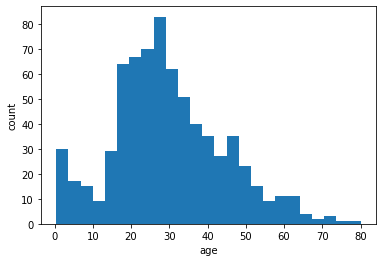

In [70]:
plt.hist(dataset['age'], bins=25)
plt.xlabel('age')
plt.ylabel('count')
plt.show()

In [71]:
max_age = dataset['age'].max()
min_age = dataset['age'].min()

print("Максимальный возраст: {:.2f}".format(max_age))
print("Минимальный возраст: {:.2f}".format(min_age))

Максимальный возраст: 80.00
Минимальный возраст: 0.42


In [72]:
mean_age = dataset['age'].mean()
print("Средний возраст: {:.2f}".format(mean_age))

Средний возраст: 29.70


In [73]:
mean_age_by_sex = dataset.groupby('sex')['age'].mean()
print(mean_age_by_sex)

sex
female    27.915709
male      30.726645
Name: age, dtype: float64


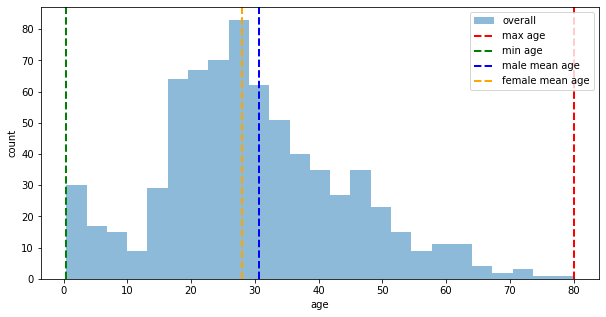

In [74]:
plt.figure(figsize=(10, 5))

plt.hist(dataset['age'], bins=25, alpha=0.5, label='overall')

plt.axvline(max_age, color='red', linestyle='dashed', linewidth=2, label='max age')
plt.axvline(min_age, color='green', linestyle='dashed', linewidth=2, label='min age')

plt.axvline(mean_age_by_sex['male'], color='blue', linestyle='dashed', linewidth=2, label='male mean age')
plt.axvline(mean_age_by_sex['female'], color='orange', linestyle='dashed', linewidth=2, label='female mean age')

plt.legend()
plt.xlabel('age')
plt.ylabel('count')
plt.show()

Исходя из графика можем заметить, что женщины были в среднем младше мужчин на 2-3 года и большинство пассажиров были в возрасте от 17~ лет до 31~ года

**Распределение мужчин и женщин по возрастам**

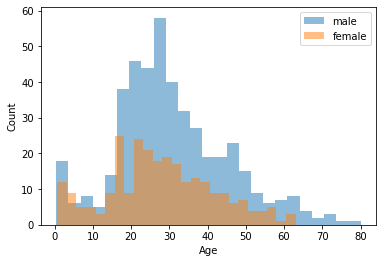

In [75]:
male_ds = dataset[dataset['sex'] == 'male']
female_ds = dataset[dataset['sex'] == 'female']

plt.hist(male_ds['age'], bins=25, alpha=0.5, label='male')

plt.hist(female_ds['age'], bins=25, alpha=0.5, label='female')

plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.show()

**Задание 3** (1 балла) <br/>
Найдите все титулы пассажиров (например, *Capt., Mr.,Mme.*), которые записаны в колонке Name, и ответьте на следующие вопросы:

    * Сколько всего уникальных титулов?
    * Сколько всего пассажиров по каждому титулу??
    * Какой наиболее популярный титул у мужчин? У женщин?
    
**Подсказка** Вы можете извлечь титул из имени, так как это слово, которое содержит точку.

In [76]:
dataset['title'] = dataset['name'].str.split(', ').str[1].str.split('.').str[0]

unique_titles = dataset['title'].nunique()
print(f"Количество уникальных титулов: {unique_titles}\n")

passengers_per_title = dataset.groupby('title')['name'].count()
print(f"Количетсво пассажиров по каждому титулу : \n{passengers_per_title}\n")

male_titles = dataset[dataset['sex'] == 'male'].groupby('title')['name'].count()
most_popular_male_title = male_titles.idxmax()
print(f"Наиболее популярный титул у мужчин: {most_popular_male_title}")

female_titles = dataset[dataset['sex'] == 'female'].groupby('title')['name'].count()
most_popular_female_title = female_titles.idxmax()
print(f"Наиболее популярный титул у женщин: {most_popular_female_title}")

Количество уникальных титулов: 17

Количетсво пассажиров по каждому титулу : 
title
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
Name: name, dtype: int64

Наиболее популярный титул у мужчин: Mr
Наиболее популярный титул у женщин: Miss


**Задание 4** (0.5 балла) <br/>
Присутствует ли корреляция между *pclass* и *ticket price*? Посчитайте среднюю цену для каждого порта и визуализируйте распределение цен по каждому порту. Сделайие выводы по графику

Подсказка: вы можете сделать разные типы графиков, такие как box, violine, pair, histogram. Обоснуйте выбор графиков и сделайте значимые выводы



In [77]:
corr_ratio = dataset['pclass'].corr(dataset['fare'])
print(corr_ratio)

-0.5494996199439078


Коэффициент корреляции Пирсона ~ -0.55, это значит что в данном случае присутствует отрицательная корреляция - чем выше значение переменоой Pclass(1, 2, 3 классы), тем ниже значение переменной Fare(цены билета)

Средняя цена по портам:

In [79]:
mean_fare = dataset.groupby('embarked')['fare'].mean()
print(mean_fare)

embarked
C    59.954144
Q    13.276030
S    27.079812
Name: fare, dtype: float64


Чтобы не мучаться и не строить на одном гарфике отдельные гистограммы для цен на билеты в каждом порту с помощью Pyplot, воспользуемся возможностями Seaborn

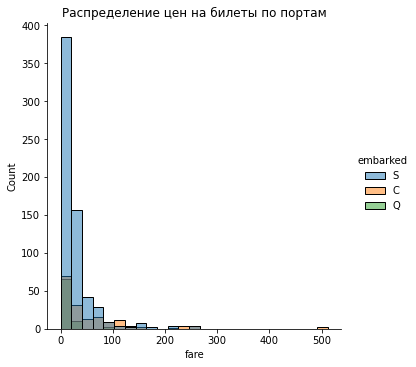

In [80]:
sns.displot(data=dataset, x="fare", hue="embarked", kde=False, bins=25)
plt.title("Распределение цен на билеты по портам")
plt.show()

<AxesSubplot:xlabel='embarked', ylabel='fare'>

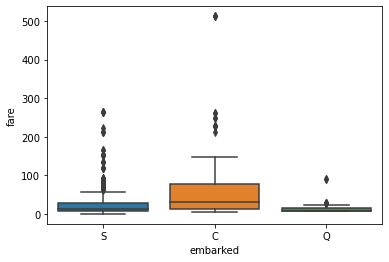

In [81]:
sns.boxplot(x='embarked', y='fare', data=dataset)

**Выводы:**
* Распределение цен билетов для порта Cherbourg имеет самый широкий размах, значит в этом порту вероятно было не мало разнообразных по классу пассажиров
* Пассажиры, купившие билет в порту Queenstown, в среднем заплатили за билеты меньше
* Средняя цена билетов самая высокая в порту Cherbourg, скорее всего большинство богачей отбывали именно из этого порта
* Из-за выбросов в порте Cherbourg, можно сделать вывод, что оттуда отбыло некоторое количество очень богатых или важных(с точки зрения социального статуса) пассажиров

<AxesSubplot:xlabel='pclass', ylabel='fare'>

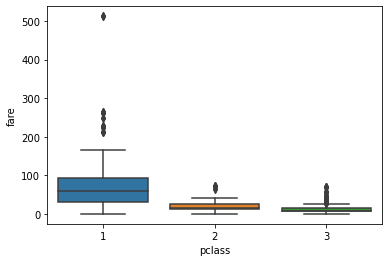

In [82]:
sns.boxplot(x='pclass', y='fare', data=dataset)

Из данного графика можем сделать вывод, что самый большой разброс цен был в первом классе, там же были самые значительные выбросы, самое маленькое распределение цен в 3 классе, там билеты разных типов отличались друг от друга не сильно.

**Задание 5** (0.5 балла) <br/>
Такие же вопросы, как и в задании 4, но про корреляцию между *embarked* и *ticket priсe*.

Построим график рассеяния:

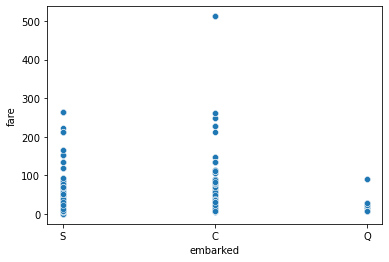

In [83]:
sns.scatterplot(data=dataset, x='embarked', y='fare')
plt.show()

Цена билета сильно варьируется от порта посадки. В среднем цены на билеты ниже в порте Queenstown, однако исходя из графика мы не можем сделать явных выводов о городах Cherbourg и Southampton, кроме этого в порте Cherbourg есть выбросы, которые могут повлиять на коэффициент корреляции

<AxesSubplot:xlabel='embarked', ylabel='fare'>

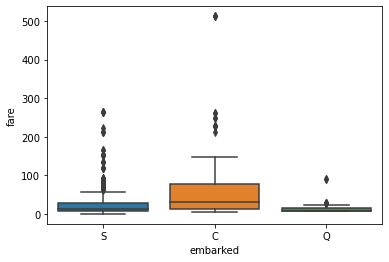

In [84]:
sns.boxplot(x='embarked', y='fare', data=dataset)

Мы видим, что медианная цена билета самая высокая в порту Cherbourg. Для портов Queenstown и Southampton медианная цена билета примерно одинакова. На основании вышеуказанных графиков, мы можем сделать вывод, что явной корреляции здесь нет

Можем пойти дальше, и расчиать p-value и коэффициент Пирсона для данного случая(что наверное является не лучшим решением, так как значения стобца embarked - города отправки, являются НЕчисленными данными), однако технически мы можем их заменить на значения скажем 1, 2, 3 и получить слабую положительную или слабую отрицательную корреляцию, которую подтвердит p-value около 0.05

**Задание 6** (0.5 балла) <br/>
Визуализируйте распределение возарста для выживших и погибших пассажиров по отдельности, посчитайте средний возраст по выжившим и погибшим. Отличаются ли они? Постройте визуализацию для мужчин и женщин по отдельности. Сделайте выводы о том, что вы видите на графиках

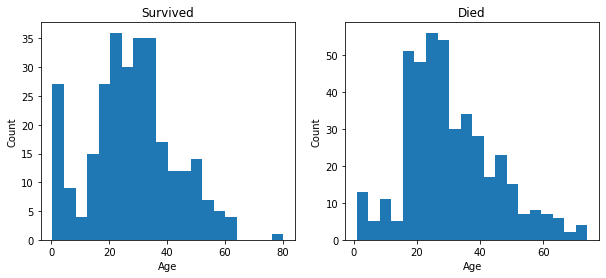

In [85]:
survived = dataset.groupby('survived').get_group(1)
died = dataset.groupby('survived').get_group(0)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].hist(survived['age'].dropna(), bins=20)
axs[0].set_title('Survived')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')

axs[1].hist(died['age'].dropna(), bins=20)
axs[1].set_title('Died')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Count')

plt.show()

In [86]:
mean_age_survived = survived['age'].mean()
mean_age_died = died['age'].mean()
print("Средний возраст выживших:{:.2f}".format(mean_age_survived))
print("Средний возраст погибших:{:.2f}".format(mean_age_died))

Средний возраст выживших:28.34
Средний возраст погибших:30.63


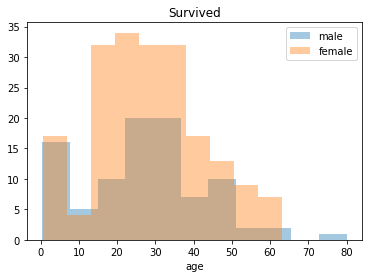

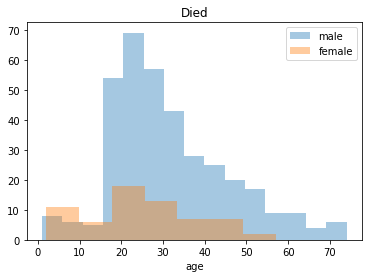

In [91]:
survived_df = dataset[dataset['survived'] == 1]
not_survived_df = dataset[dataset['survived'] == 0]

sns.distplot(survived_df[survived_df['sex'] == 'male']['age'].dropna(), kde=False, label='male')
sns.distplot(survived_df[survived_df['sex'] == 'female']['age'].dropna(), kde=False, label='female')
plt.legend()
plt.title('Survived')
plt.show()

sns.distplot(not_survived_df[not_survived_df['sex'] == 'male']['age'].dropna(), kde=False, label='male')
sns.distplot(not_survived_df[not_survived_df['sex'] == 'female']['age'].dropna(), kde=False, label='female')
plt.legend()
plt.title('Died')
plt.show()

Распределение возраста выживших и погибших пассажиров различается в зависимости от пола. 

В обоих случаях видно, что среди женщин было больше выживших чем погибших. Среди мужчин погибших было больше чем выживших.

Для погибших мужчин распределение более симметрично, чем для выживших. У погибших женщин распределение более равномерное и присутствует выраженный пик возраста.